In [1618]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn

In [1619]:
df = pd.read_csv('Cancer_Data.csv',encoding='utf-8')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.shape)
df.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1620]:
target_column = ['diagnosis'] 
remove_cols = ['id']
object = StandardScaler()
predictors = list(set(list(df.columns))-set(target_column) - set(remove_cols))
df[predictors] = object.fit_transform(df[predictors])
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,-1.373633e-16,1.000880e+00,-2.029648,-0.689385,-0.215082,4.693926e-01,3.971288e+00
texture_mean,569.0,6.868164e-17,1.000880e+00,-2.229249,-0.725963,-0.104636,5.841756e-01,4.651889e+00
perimeter_mean,569.0,-1.248757e-16,1.000880e+00,-1.984504,-0.691956,-0.235980,4.996769e-01,3.976130e+00
area_mean,569.0,-2.185325e-16,1.000880e+00,-1.454443,-0.667195,-0.295187,3.635073e-01,5.250529e+00
smoothness_mean,569.0,-8.366672e-16,1.000880e+00,-3.112085,-0.710963,-0.034891,6.361990e-01,4.770911e+00
compactness_mean,569.0,1.873136e-16,1.000880e+00,-1.610136,-0.747086,-0.221940,4.938569e-01,4.568425e+00
concavity_mean,569.0,4.995028e-17,1.000880e+00,-1.114873,-0.743748,-0.342240,5.260619e-01,4.243589e+00
concave points_mean,569.0,-4.995028e-17,1.000880e+00,-1.261820,-0.737944,-0.397721,6.469351e-01,3.927930e+00
symmetry_mean,569.0,1.748260e-16,1.000880e+00,-2.744117,-0.703240,-0.071627,5.307792e-01,4.484751e+00


In [1603]:
X = df[predictors].values
y = df[target_column].values
test_size=0.30
develop_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=40)
X_trainnodev = X_train
X_testnodev = X_test
y_trainnodev = y_train
y_testnodev = y_test
newX_train = X_train
newX_test = X_test
newy_train = y_train
newy_test = y_test
post_split_develop_size = develop_size / (1 - test_size)
X_train, X_develop, y_train, y_develop = train_test_split(X_train, y_train, test_size=post_split_develop_size, random_state=40)
print(X_train.shape); print(X_test.shape); print(X_develop.shape)

(284, 30)
(171, 30)
(114, 30)


In [1605]:
lrc = LogisticRegression(random_state=0, max_iter=1000 ,verbose = True)
lrc.fit(newX_train, newy_train.ravel())
regpred_train = lrc.predict(newX_train)
regpred_test = lrc.predict(newX_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           B       0.98      0.98      0.98       115
           M       0.96      0.96      0.96        56

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

MATRIZ DE CONFUSAO DO TESTE DA REGRESSAO LOGISTICA


[Text(0, 0.5, 'benigno'), Text(0, 1.5, 'maligno')]

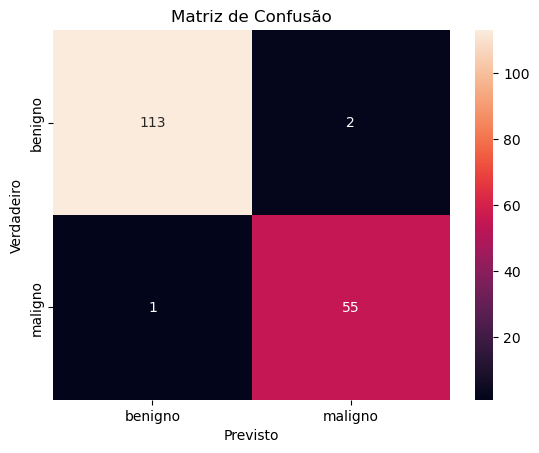

<Figure size 200x200 with 0 Axes>

In [1651]:
import seaborn as sn
print(classification_report(newy_test,regpred_test))
print("MATRIZ DE CONFUSAO DO TESTE DA REGRESSAO LOGISTICA")
confmat = confusion_matrix(y_testnodev,predict_test)
ax= plt.subplot()
plt.figure(figsize = confmat.shape)
sn.heatmap(confmat, annot=True, fmt='d', ax=ax)
ax.set_xlabel('Previsto');ax.set_ylabel('Verdadeiro'); 
ax.set_title('Matriz de Confusão')
ax.xaxis.set_ticklabels(['benigno', 'maligno']); ax.yaxis.set_ticklabels(['benigno', 'maligno'])

In [1607]:
mlp = MLPClassifier( max_iter=2000)
mlpdev = MLPClassifier( max_iter=4000)

In [1608]:
parameter_space = {
    'hidden_layer_sizes': [(17,17),(16,16), (32,32)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive']
    }
random_search = RandomizedSearchCV(mlp, parameter_space,n_iter = 12, cv = 5)
random_search.fit(X_trainnodev,y_trainnodev.ravel())
params = random_search.best_params_
score = random_search.best_score_
print(params);print(score)

{'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (17, 17), 'activation': 'relu'}
0.9698101265822784


In [1609]:
devrandom_search = RandomizedSearchCV(mlpdev, parameter_space,n_iter = 18, cv = 5)
devrandom_search.fit(X_develop,y_develop.ravel())
paramsdev = devrandom_search.best_params_
scoredev = devrandom_search.best_score_
print(paramsdev);print(scoredev)

{'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (17, 17), 'activation': 'tanh'}
0.9826086956521738


In [1610]:
print("test_score logistic regression", accuracy_score(newy_test,regpred_test))

test_score logistic regression 0.9766081871345029


In [1611]:
predict_test = random_search.predict(X_testnodev)
testscore = accuracy_score(y_testnodev,predict_test)
print("test_score normal model", testscore)

test_score normal model 0.9824561403508771


In [1612]:
predict_testdev = devrandom_search.predict(X_testnodev)
testscore = accuracy_score(y_test,predict_testdev)
print("test_score dev model", testscore)

test_score dev model 0.9532163742690059


              precision    recall  f1-score   support

           B       0.99      0.98      0.99       115
           M       0.96      0.98      0.97        56

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

MATRIZ DE CONFUSAO DO TESTE DO MODELO SEM DESENVOLVIMENTO


[Text(0, 0.5, 'benigno'), Text(0, 1.5, 'maligno')]

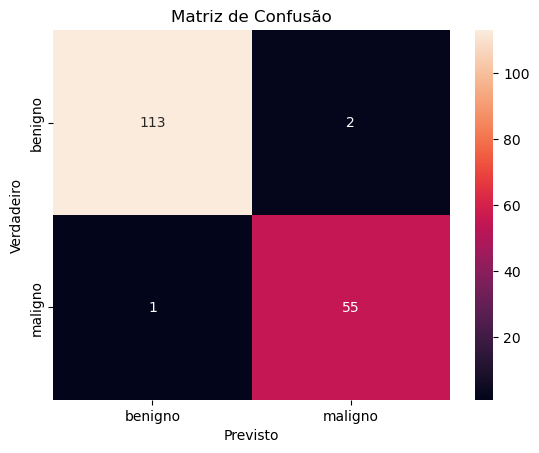

<Figure size 200x200 with 0 Axes>

In [1650]:
import seaborn as sn
print(classification_report(y_testnodev,predict_test))
confmat = confusion_matrix(y_testnodev,predict_test)
print("MATRIZ DE CONFUSAO DO TESTE DO MODELO SEM DESENVOLVIMENTO")
ax= plt.subplot()
plt.figure(figsize = confmat.shape)
sn.heatmap(confmat, annot=True, fmt='d', ax=ax)
ax.set_xlabel('Previsto');ax.set_ylabel('Verdadeiro'); 
ax.set_title('Matriz de Confusão')
ax.xaxis.set_ticklabels(['benigno', 'maligno']); ax.yaxis.set_ticklabels(['benigno', 'maligno'])

[[109   6]
 [  2  54]]
              precision    recall  f1-score   support

           B       0.98      0.95      0.96       115
           M       0.90      0.96      0.93        56

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171

MATRIZ DE CONFUSAO DO TESTE DO MODELO COM DESENVOLVIMENTO


[Text(0, 0.5, 'benigno'), Text(0, 1.5, 'maligno')]

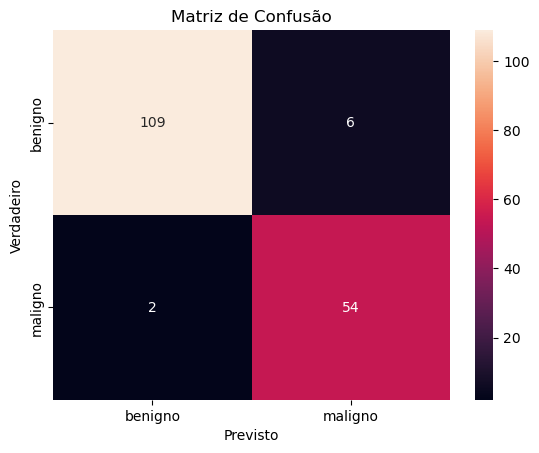

<Figure size 200x200 with 0 Axes>

In [1649]:
print(confusion_matrix(y_test,predict_testdev))
print(classification_report(y_test,predict_testdev,zero_division=1))
print("MATRIZ DE CONFUSAO DO TESTE DO MODELO COM DESENVOLVIMENTO")
confmat = confusion_matrix(y_test,predict_testdev)
ax= plt.subplot()
plt.figure(figsize = confmat.shape)
sn.heatmap(confmat, annot=True, fmt='d', ax=ax)
ax.set_xlabel('Previsto');ax.set_ylabel('Verdadeiro'); 
ax.set_title('Matriz de Confusão')
ax.xaxis.set_ticklabels(['benigno', 'maligno']); ax.yaxis.set_ticklabels(['benigno', 'maligno'])